# Algorithm 01: Trial Run

## Requirements

In [76]:
# data wrangling
import pandas as pd
import numpy as np

# General visualization
import matplotlib.pyplot as plt
import seaborn as sns

# #Resampling
# from imblearn.over_sampling import SMOTENC
# from sklearn.utils import class_weight

# #Dimension Reduction
# from sklearn.decomposition import PCA

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# # Models Pipelines
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as ImbPipeline

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix


## 1- Loading the dataset

In [77]:
file_path = r"C:\Users\jfxbu\OneDrive - Universitaet St.Gallen\Dokumente\Coding\Bachelorthesis\Predictive_Maintenance\RAG-PredictiveMaintenance\0-dataset\ai4i2020_dataset.csv"
df = pd.read_csv(file_path)
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## 2- Exploratory Data Analysis (EDA)

### 2.1- Overview

In [78]:
# Get overview about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [79]:
# Description of numeric features
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### 2.2- Missing Values & Duplicates

In [80]:
#Check for duplicates
data_duplicates = df.duplicated().sum()
print("Total duplicated values: ", data_duplicates)

Total duplicated values:  0


In [81]:
# Check for missing values
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


### 2.3- Data Distribution

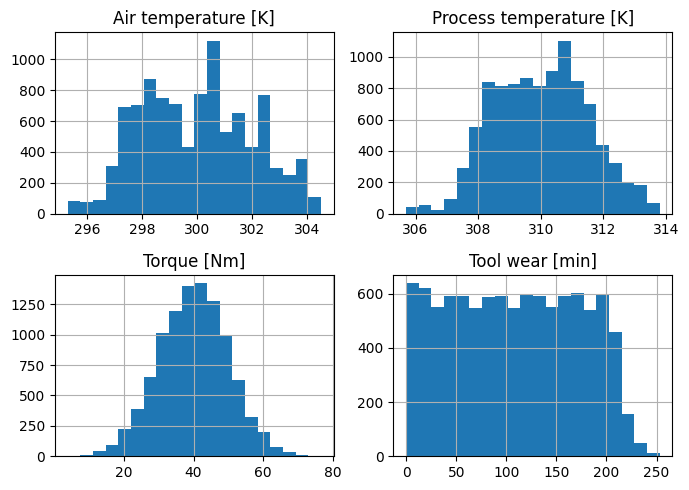

In [82]:
# Histogram of continous features
df[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']].hist(bins=20, figsize=(7, 5))
plt.tight_layout()
plt.show()

In [83]:
# # Compute correlation matrix
# corr_matrix = df.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

### 2.4 Exploration of Target Variable

In [84]:
# Check class balance
print(df['Machine failure'].value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64


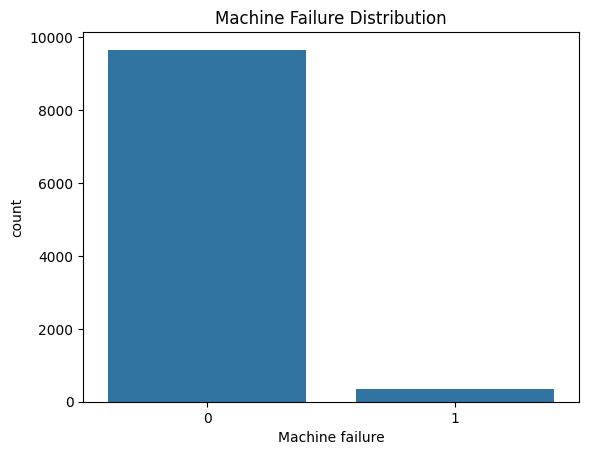

In [85]:
# Failure distribution
sns.countplot(x='Machine failure', data=df)
plt.title('Machine Failure Distribution')
plt.show()

In [86]:
#Transformation of Failure Type
failure_mapping = {
    'TWF': 'Tool Wear Failure',
    'HDF': 'Heat Dissipation Failure',
    'PWF': 'Power Failure',
    'OSF': 'Overstrain Failure',
    'RNF': 'Random Failures'
}

# Create the column: Failure Type
def determine_failure_type(row):
    for column, failure_type in failure_mapping.items():
        if row[column] == 1:
            return failure_type
    return 'No Failure'

df['Failure Type'] = df.apply(determine_failure_type, axis=1)

df.drop(columns=failure_mapping.keys(), inplace=True)

In [87]:
# Check the updated DataFrame
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [88]:
# Proportion of machine failure types
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     115
Power Failure                 91
Overstrain Failure            78
Tool Wear Failure             46
Random Failures               18
Name: count, dtype: int64

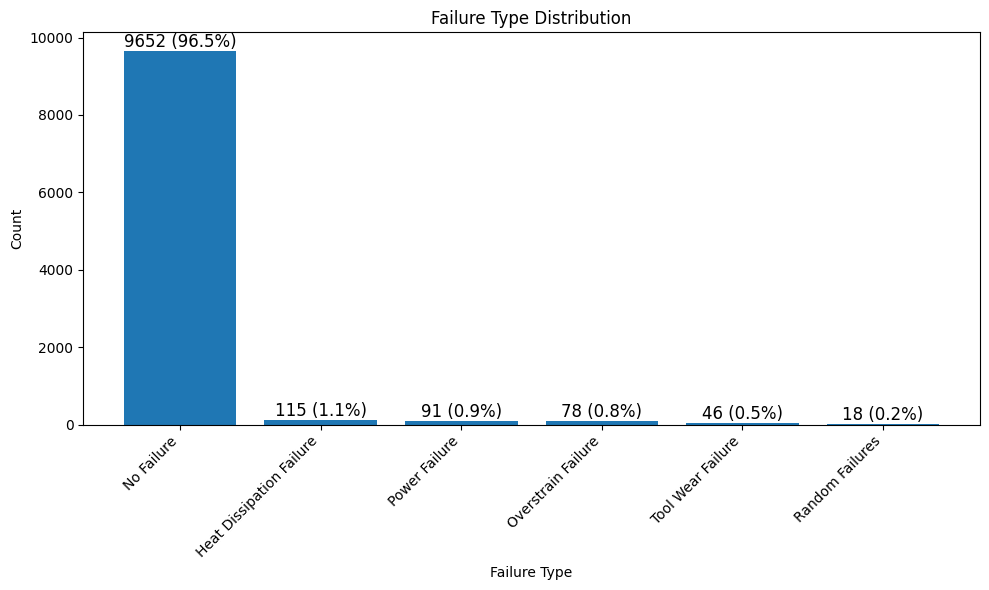

In [89]:
# Count occurrences and calculate percentages
failure_counts = df['Failure Type'].value_counts()
failure_percentages = (failure_counts / failure_counts.sum()) * 100  # Convert to percentages

# Plot the failure type distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.index, failure_counts.values)

# labels with both count and percentage
for bar, count, percentage in zip(bars, failure_counts.values, failure_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{count} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=12)

# Labels and title
plt.title("Failure Type Distribution", fontsize=12)
plt.xlabel("Failure Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

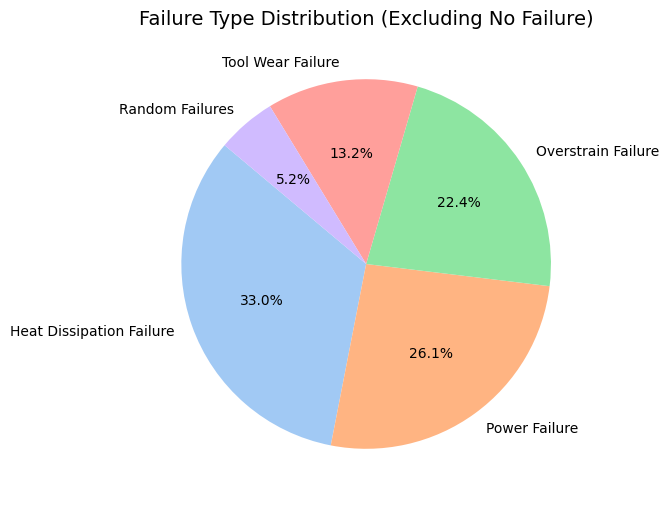

In [90]:
# piechart of exlusively failure type distribution
failure_only_df = df[df['Failure Type'] != 'No Failure']
failure_counts = failure_only_df['Failure Type'].value_counts()

# Pie Chart for Failures Distribution
plt.figure(figsize=(6, 6))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=140)
plt.title('Failure Type Distribution (Excluding No Failure)', fontsize=14)
plt.show()

## 3- Feature Engineering & Data Preprocessing

In [91]:
# Renaming of columns
rename_columns = {
    'UDI':'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]' : 'Process_temperature',
    'Rotational speed [rpm]' : 'Rotational_speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_wear',
    'Product ID' : 'Product_ID',
    'Machine failure': 'Machine_failure',
    'Failure Type': 'Failure_type'    
}

df.rename(rename_columns, axis = 1, inplace = True)

In [92]:
## Renaming the classes
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}

df['Type'] = df['Type'].replace(rename_type)


### 3.1- Identify redundant rows

In [93]:
# Analysing redundance value, count failures on 'Machine failure' column
count_failures = (df['Machine_failure'] == 1).sum()
print('Number of failures:', count_failures)

# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Machine_failure'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

Number of failures: 339
Sum of failures different of "No Failure": 330


### 3.2- Remove redunant rows

In [94]:
# Filter the rows with has 1 in the column "Machine failure" and 'No Failure' in the column 'Failure_type'
rows_to_remove = df[(df['Machine_failure'] == 1) & (df['Failure_type'] == 'No Failure')]

# Remove this filtered row in the main df
df.drop(rows_to_remove.index, inplace=True)

### 3.3- Remove unnecessary columns

In [95]:
drop_columns = ["ID", "Product_ID", "Machine_failure"]
df.drop(drop_columns, axis = 1, inplace = True)

### 3.4- Elimination of random (unpredictable) failures

In [96]:
df = df.loc[df['Failure_type'] != 'Random Failures']

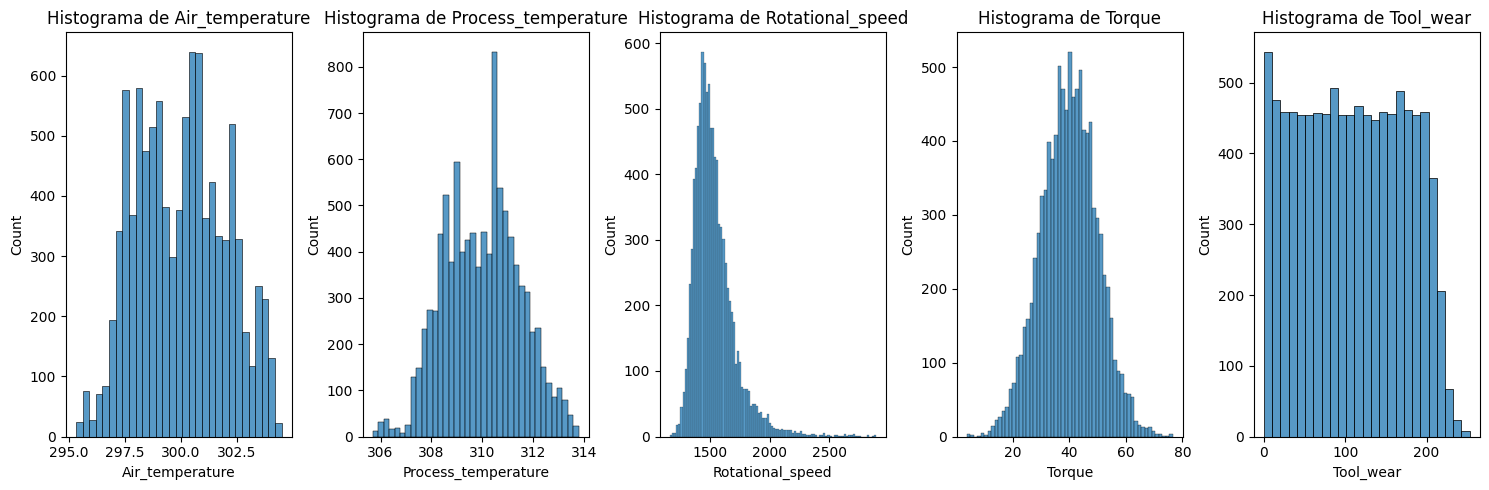

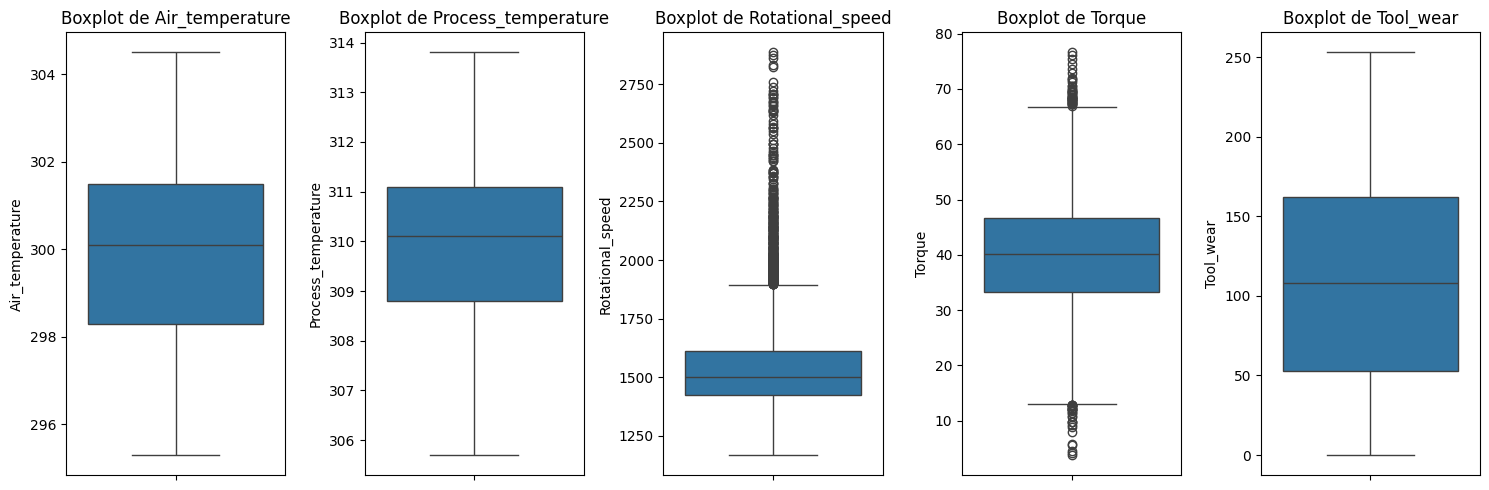

In [97]:
numeric_features = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
categoric_features = ['Type']

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(15, 5))

# Plot histograms 
for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')

# Adjust subplot 
plt.tight_layout()

# Show histogram 
plt.show()

# Create the figure and axess
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(15, 5))

# Plot boxplot side by side
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')

# Adjust subplot
plt.tight_layout()

# Show boxplots
plt.show()

## 4- Modeling

### Simple Model

In [100]:
# Define features and target
X = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]
y = df['Failure_type']

# Encode target variable (Convert Failure Type into numeric labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training size: {X_train.shape}")
print(f"Testing size: {X_test.shape}")

Training size: (7978, 5)
Testing size: (1995, 5)


#### Baseline Model (Logistic Regression)

In [104]:
# Train logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.70      0.61      0.65        23
              No Failure       0.98      0.99      0.99      1929
      Overstrain Failure       0.45      0.31      0.37        16
           Power Failure       0.92      0.67      0.77        18
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      1995
               macro avg       0.61      0.52      0.56      1995
            weighted avg       0.97      0.98      0.97      1995



#### Advanced Model (Random Forest)

In [105]:

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Print evaluation
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.91      0.87      0.89        23
              No Failure       0.99      1.00      0.99      1929
      Overstrain Failure       0.78      0.44      0.56        16
           Power Failure       1.00      0.72      0.84        18
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.99      1995
               macro avg       0.73      0.61      0.66      1995
            weighted avg       0.98      0.99      0.98      1995



c:\Users\jfxbu\OneDrive - Universitaet St.Gallen\Dokumente\Coding\Bachelorthesis\Predictive_Maintenance\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfxbu\OneDrive - Universitaet St.Gallen\Dokumente\Coding\Bachelorthesis\Predictive_Maintenance\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jfxbu\OneDrive - Universitaet St.Gallen\Dokumente\Coding\Bachelorthesis\Predictive_Maintenance\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: 

#### Feature importance Analysis

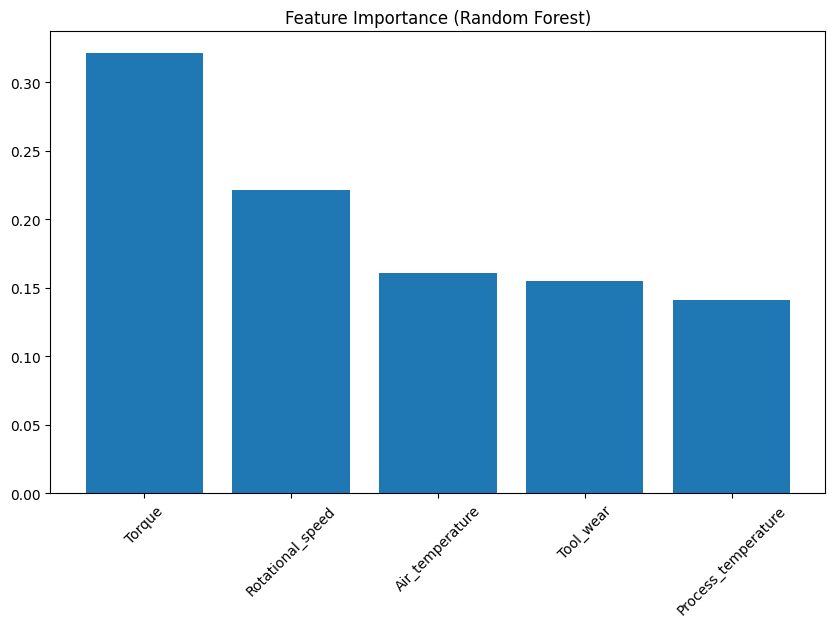

In [106]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()

#### Model Comparison

In [107]:
# Compare accuracy of both models
logreg_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {logreg_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Logistic Regression Accuracy: 0.98
Random Forest Accuracy: 0.99
